# **Exploratory Data Analysis using Python - Stack Overflow Case Study**

*Analyzing responses from the Stack Overflow Annual Developer Survey 2020*


### Key Activities

- Selecting and downloading a dataset
- Data preparation and cleaning
- Exploratory analysis and visualization
- Initiating and addressing captivating questions
- Summarizing inferences and drawing conclusions

## Stage 1 - **Downloading Data Set**

In [1]:
import pandas as pd

In [2]:
survey_raw_df = pd.read_csv('E:\Jovian\Stack overflow 2020\survey_results_public.csv')

In [3]:
survey_raw_df

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,...,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,...,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN
3,4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,...,NaN,NaN,No,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat less welcome now than last year,40.0,7,4
4,5,"I used to be a developer by profession, but no...",Yes,31.0,16,NaN,NaN,NaN,United States,NaN,...,Easy,Too short,No,"Computer science, computer engineering, or sof...",Django;Ruby on Rails,Ruby on Rails,Just as welcome now as I felt last year,NaN,15,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64456,64858,NaN,Yes,NaN,16,NaN,NaN,NaN,United States,NaN,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,NaN,NaN,10,Less than 1 year
64457,64867,NaN,Yes,NaN,NaN,NaN,NaN,NaN,Morocco,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64458,64898,NaN,Yes,NaN,NaN,NaN,NaN,NaN,Viet Nam,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64459,64925,NaN,Yes,NaN,NaN,NaN,NaN,NaN,Poland,NaN,...,NaN,NaN,NaN,NaN,Angular;Angular.js;React.js,NaN,NaN,NaN,NaN,NaN


The dataset contains over **64,000 responses** to **60 questions** (although many questions are optional). The responses have been anonymized to remove personally identifiable information, and each respondent has been assigned a randomized respondent ID.

Let's view the list of columns in the data frame. 

In [4]:
survey_raw_df.columns

Index(['Respondent', 'MainBranch', 'Hobbyist', 'Age', 'Age1stCode', 'CompFreq',
       'CompTotal', 'ConvertedComp', 'Country', 'CurrencyDesc',
       'CurrencySymbol', 'DatabaseDesireNextYear', 'DatabaseWorkedWith',
       'DevType', 'EdLevel', 'Employment', 'Ethnicity', 'Gender', 'JobFactors',
       'JobSat', 'JobSeek', 'LanguageDesireNextYear', 'LanguageWorkedWith',
       'MiscTechDesireNextYear', 'MiscTechWorkedWith',
       'NEWCollabToolsDesireNextYear', 'NEWCollabToolsWorkedWith', 'NEWDevOps',
       'NEWDevOpsImpt', 'NEWEdImpt', 'NEWJobHunt', 'NEWJobHuntResearch',
       'NEWLearn', 'NEWOffTopic', 'NEWOnboardGood', 'NEWOtherComms',
       'NEWOvertime', 'NEWPurchaseResearch', 'NEWPurpleLink', 'NEWSOSites',
       'NEWStuck', 'OpSys', 'OrgSize', 'PlatformDesireNextYear',
       'PlatformWorkedWith', 'PurchaseWhat', 'Sexuality', 'SOAccount',
       'SOComm', 'SOPartFreq', 'SOVisitFreq', 'SurveyEase', 'SurveyLength',
       'Trans', 'UndergradMajor', 'WebframeDesireNextYear',
  

It seems that question **shortcodes** have been used as column headers 

To access the complete text of each question, we refer to schema file, which consists of just two columns: 'Column' and 'QuestionText.' 
Load this file into a Pandas Series, using 'Column' as the index and 'QuestionText' as the corresponding value

In [5]:
schema_fname = 'E:\Jovian\Stack overflow 2020\survey_results_schema.csv'
schema_raw = pd.read_csv(schema_fname, index_col='Column').QuestionText
# we dont need data frame here, as we only have one column

In [6]:
schema_raw

Column
Respondent            Randomized respondent ID number (not in order ...
MainBranch            Which of the following options best describes ...
Hobbyist                                        Do you code as a hobby?
Age                   What is your age (in years)? If you prefer not...
Age1stCode            At what age did you write your first line of c...
                                            ...                        
WebframeWorkedWith    Which web frameworks have you done extensive d...
WelcomeChange         Compared to last year, how welcome do you feel...
WorkWeekHrs           On average, how many hours per week do you wor...
YearsCode             Including any education, how many years have y...
YearsCodePro          NOT including education, how many years have y...
Name: QuestionText, Length: 61, dtype: object

*Lets retrieve **full question text** for any column in survey_raw_df*

In [7]:
schema_raw['YearsCodePro']

'NOT including education, how many years have you coded professionally (as a part of your work)?'

## Stage 2 - **Data Preparation & Cleaning**

*Although the survey responses encompass a **vast amount of information**, we will **restrict** our **analysis** to the following areas*

- Demographics of the survey respondents and the global programming community
- Distribution of programming skills, experience, and preferences
- Employment-related information, preferences, and opinions

We'll choose specific columns that contain the relevant data for our analysis

In [8]:
selected_columns = [
    # Demographics
    'Country',
    'Age',
    'Gender',
    'EdLevel',
    'UndergradMajor',
    # Programming experience
    'Hobbyist',
    'Age1stCode',
    'YearsCode',
    'YearsCodePro',
    'LanguageWorkedWith',
    'LanguageDesireNextYear',
    'NEWLearn',
    'NEWStuck',
    # Employment
    'Employment',
    'DevType',
    'WorkWeekHrs',
    'JobSat',
    'JobFactors',
    'NEWOvertime',
    'NEWEdImpt'
]

In [9]:
len(selected_columns)

20

#### Creating Copy of Data Frame
Lets create a new data frame, "survey_df," by extracting a copy of the data from these columns. This way, we can make further modifications without impacting the original data frame

In [10]:
survey_df = survey_raw_df[selected_columns].copy()

In [11]:
schema = schema_raw[selected_columns]

In [12]:
survey_df.shape

(64461, 20)

Dataset contains 64461 Rows and 20 Columns

In [13]:
survey_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64461 entries, 0 to 64460
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country                 64072 non-null  object 
 1   Age                     45446 non-null  float64
 2   Gender                  50557 non-null  object 
 3   EdLevel                 57431 non-null  object 
 4   UndergradMajor          50995 non-null  object 
 5   Hobbyist                64416 non-null  object 
 6   Age1stCode              57900 non-null  object 
 7   YearsCode               57684 non-null  object 
 8   YearsCodePro            46349 non-null  object 
 9   LanguageWorkedWith      57378 non-null  object 
 10  LanguageDesireNextYear  54113 non-null  object 
 11  NEWLearn                56156 non-null  object 
 12  NEWStuck                54983 non-null  object 
 13  Employment              63854 non-null  object 
 14  DevType                 49370 non-null

Age and WorkWeekHrs are of **float** data type, rest of the entries are of **object** data type

- **Data Type Issues:**
  - Most columns currently have the data type **object**.
  - This is mainly due to the presence of various value types and empty values (**NaN**).
  - Each column contains some empty values, as the **Non-Null** count is less than the total row count (64461).
  - We need to address empty values and manually adjust data types for each column as required.
  

- **Numeric Data Conversion:**
  - Currently, only two columns are recognized as numeric: **Age** and **WorkWeekHrs**.
  - However, some other columns mostly contain numeric values.
  - To simplify our analysis, we will **convert** selected columns into **numeric** data types.
  - Non-numeric values will be treated as **NaN**.


In [14]:
survey_df['Age1stCode'] = pd.to_numeric(survey_df.Age1stCode, errors='coerce')
survey_df['YearsCode'] = pd.to_numeric(survey_df.YearsCode, errors='coerce')
survey_df['YearsCodePro'] = pd.to_numeric(survey_df.YearsCodePro, errors='coerce')

Let's now view some basic statistics about numeric columns.

In [15]:
survey_df.describe()

,Age,Age1stCode,YearsCode,YearsCodePro,WorkWeekHrs
count,45446.000000,57473.000000,56784.000000,44133.000000,41151.000000
mean,30.834111,15.476572,12.782051,8.869667,40.782174
std,9.585392,5.114081,9.490657,7.759961,17.816383
min,1.000000,5.000000,1.000000,1.000000,1.000000
25%,24.000000,12.000000,6.000000,3.000000,40.000000
50%,29.000000,15.000000,10.000000,6.000000,40.000000
75%,35.000000,18.000000,17.000000,12.000000,44.000000
max,279.000000,85.000000,50.000000,50.000000,475.000000


- **Issue with Age Column:**
    - There is a problem with the `Age` column in the dataset.
    - The minimum value is 1, and the maximum is 279, which are likely invalid entries.
    - Such discrepancies in survey data can arise from accidental or intentional errors during responses 

- **Resolution:**
To address this issue, we can apply the following fix:
    - Exclude rows where the age is either higher than 100 years or lower than 10 years, considering them as invalid survey responses.
    - This can be accomplished using the `.drop` method.


In [16]:
survey_df.drop(survey_df[survey_df.Age < 10].index, inplace=True)
survey_df.drop(survey_df[survey_df.Age > 100].index, inplace=True)

**Issue with WorkWeekHrs Column:**
- Some entries have values exceeding 140 hours, which is unrealistic (approximately 20 hours per day).

**Resolution:**
To address this issue, we should apply the following fix:
- Exclude entries where the value for the `WorkWeekHrs` column exceeds 140 hours.
- This filtering step will help us remove potentially erroneous or impractical data points from the survey responses.



In [17]:
survey_df.drop(survey_df[survey_df.WorkWeekHrs > 140].index, inplace=True)

**Handling Multiple Options in Gender Column:**
- The `Gender` column in the dataset allows for selecting multiple options.
- To simplify our analysis, we will remove values that contain more than one option in this column.


In [18]:
survey_df['Gender'].value_counts()

Man                                                            45895
Woman                                                           3835
Non-binary, genderqueer, or gender non-conforming                385
Man;Non-binary, genderqueer, or gender non-conforming            121
Woman;Non-binary, genderqueer, or gender non-conforming           92
Woman;Man                                                         73
Woman;Man;Non-binary, genderqueer, or gender non-conforming       25
Name: Gender, dtype: int64

In [19]:
import numpy as np

In [20]:
survey_df.where(~(survey_df.Gender.str.contains(';', na=False)), np.nan, inplace=True)

We've now cleaned up and prepared the dataset for analysis. Let's take a look at a **sample of rows** from the data frame.

In [21]:
survey_df.sample(10)

,Country,Age,Gender,EdLevel,UndergradMajor,Hobbyist,Age1stCode,YearsCode,YearsCodePro,LanguageWorkedWith,LanguageDesireNextYear,NEWLearn,NEWStuck,Employment,DevType,WorkWeekHrs,JobSat,JobFactors,NEWOvertime,NEWEdImpt
5806,Australia,NaN,NaN,NaN,"Information systems, information technology, o...",Yes,12.0,15.0,NaN,Bash/Shell/PowerShell;Go;Java;JavaScript;Kotli...,C;C++;Go;Java;Kotlin;Rust;SQL;TypeScript,Every few months,Call a coworker or friend;Visit Stack Overflow...,"Not employed, but looking for work","Developer, back-end;Developer, full-stack",NaN,NaN,"Languages, frameworks, and other technologies ...",NaN,Not at all important/not necessary
11699,Czech Republic,24.0,Man,"Professional degree (JD, MD, etc.)",Fine arts or performing arts (such as graphic ...,Yes,20.0,4.0,NaN,Swift,Swift,Once a year,Visit Stack Overflow;Go for a walk or other ph...,Employed full-time,NaN,NaN,NaN,NaN,NaN,Not at all important/not necessary
38198,Croatia,NaN,NaN,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",Yes,18.0,12.0,7.0,HTML/CSS;JavaScript;PHP;SQL,HTML/CSS;JavaScript;PHP;SQL,Once a year,Call a coworker or friend;Visit Stack Overflow...,Employed full-time,"Developer, back-end;Developer, front-end;Devel...",NaN,Very satisfied,NaN,NaN,Somewhat important
9489,France,25.0,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",Yes,13.0,8.0,3.0,HTML/CSS;Java;JavaScript;Objective-C;Python;SQ...,HTML/CSS;JavaScript;Python;SQL;TypeScript,Every few months,Call a coworker or friend;Visit Stack Overflow...,Employed full-time,"Developer, front-end;Developer, full-stack;Dev...",39.0,Slightly satisfied,"Languages, frameworks, and other technologies ...",Often: 1-2 days per week or more,Fairly important
50590,Austria,28.0,Man,"Other doctoral degree (Ph.D., Ed.D., etc.)","A health science (such as nursing, pharmacy, r...",Yes,13.0,6.0,4.0,Bash/Shell/PowerShell;C#;Java;JavaScript;SQL,Bash/Shell/PowerShell;C;C#;C++;Haskell;JavaScr...,Every few months,Call a coworker or friend;Visit Stack Overflow...,Employed full-time,"Academic researcher;Developer, back-end;Develo...",45.0,Neither satisfied nor dissatisfied,"Industry that I’d be working in;Languages, fra...",Often: 1-2 days per week or more,Not at all important/not necessary
31837,Belgium,59.0,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Another engineering discipline (such as civil,...",Yes,12.0,38.0,28.0,Bash/Shell/PowerShell;C;C#;C++;HTML/CSS;Java;K...,Bash/Shell/PowerShell;C;C#;C++;HTML/CSS;Kotlin...,Once every few years,Call a coworker or friend;Visit Stack Overflow...,Employed full-time,"Database administrator;Developer, back-end;Dev...",40.0,Very dissatisfied,NaN,Sometimes: 1-2 days per month but less than we...,Fairly important
5610,United States,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Information systems, information technology, o...",Yes,18.0,14.0,12.0,Java;JavaScript;SQL,JavaScript;TypeScript,Every few months,Visit Stack Overflow;Watch help / tutorial videos,Employed full-time,"Developer, full-stack",45.0,Slightly satisfied,"Flex time or a flexible schedule;Languages, fr...",Often: 1-2 days per week or more,Very important
46067,France,30.0,NaN,"Associate degree (A.A., A.S., etc.)","Computer science, computer engineering, or sof...",Yes,14.0,16.0,8.0,HTML/CSS;JavaScript,C++;HTML/CSS;JavaScript;Python;Rust,Every few months,Play games;Visit Stack Overflow;Do other work ...,"Independent contractor, freelancer, or self-em...","Developer, back-end;Developer, desktop or ente...",40.0,Slightly satisfied,Flex time or a flexible schedule;Remote work o...,Often: 1-2 days per week or more,Not at all important/not necessary
34776,Hungary,45.0,Man,Some college/university study without earning ...,"Computer science, computer engineering, or sof...",Yes,11.0,34.0,23.0,C#;HTML/CSS;Java;JavaScript;Python,C#;Go;Haskell;Java;JavaScript;Kotlin;Python,Once a year,Visit Stack Overflow;Watch h

#### **Conclusion:**
*We've now successfully **cleaned up** and **prepared** the dataset for **analysis**, addressing various data **quality issues**. With these necessary adjustments in place, we can proceed with confidence. Let's take a look at a sample of rows from the data frame to get an initial sense of the data.*

## Stage 3 - **Exploratory Analysis and Visualization**

*Before we dive into specific questions about the survey responses, it is essential to gain insights into the demographics of the respondents*

We'll analyze factors such as country of residence, age, gender, educational background, employment status, and more. This analysis aims to provide insights into the extent to which the survey accurately represents the global programming community, acknowledging that large-scale surveys often have inherent selection biases.

**Let's get started by importing the necessary libraries:**



In [22]:

import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'


### Country

Lets examine the count of unique countries represented in the survey responses. Afterward, we can create a plot that showcases the **top ten countries** with the highest number of responses.

In [23]:
schema.Country

'Where do you live?'

In [24]:
survey_df.Country.nunique()

183

We can identify the countries with the highest number of respondents using the `value_counts` method.

In [25]:
top_countries = survey_df.Country.value_counts().head(15)
top_countries

United States         12371
India                  8364
United Kingdom         3881
Germany                3864
Canada                 2175
France                 1884
Brazil                 1804
Netherlands            1332
Poland                 1259
Australia              1199
Spain                  1157
Italy                  1115
Russian Federation     1085
Sweden                  879
Pakistan                802
Name: Country, dtype: int64

We can visualize this information using a bar chart.

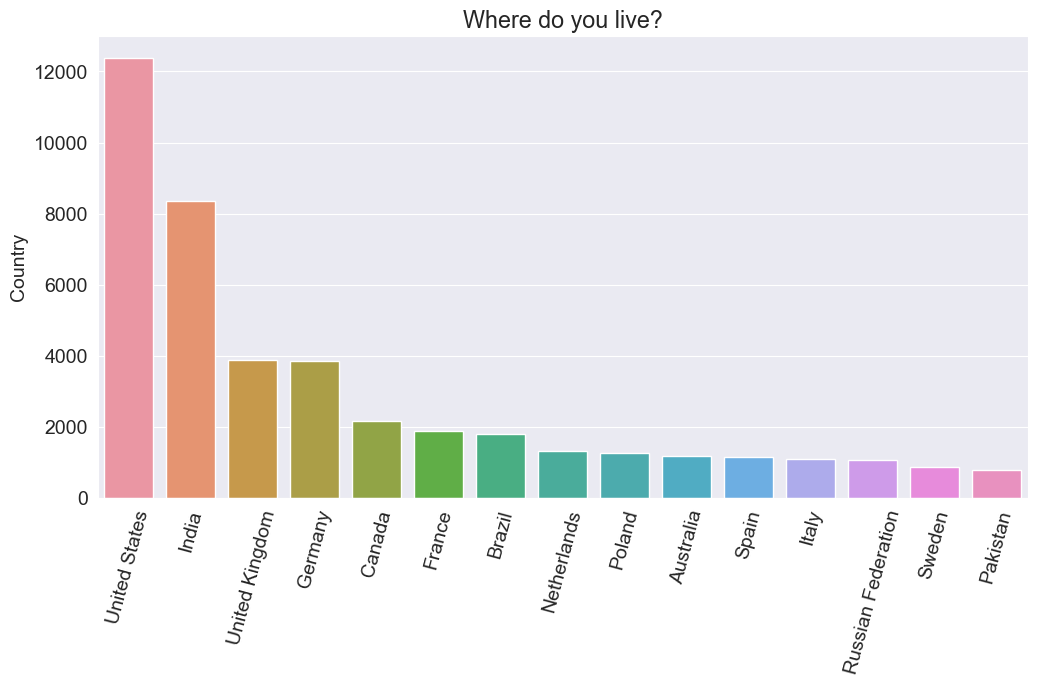

In [62]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=75)
plt.title(schema.Country)
sns.barplot(x=top_countries.index, y=top_countries);
plt.savefig('test.png', bbox_inches='tight')

- **Observation:**
  - *Disproportionate Response from Certain Countries:*
    - It appears that a **disproportionately** high number of respondents are from the _US_ and _India_.
    - This phenomenon could be attributed to the survey being conducted in English, and these countries have the highest English-speaking populations.
  - *Representation Concerns:*
    - This observation suggests that the survey may not be representative of the global programming community.
    - Particularly, programmers from non-English speaking countries are almost certainly **underrepresented**.


### Age

Age distribution analysis of respondents is another critical aspect to explore. We can effectively visualize this by using a histogram.

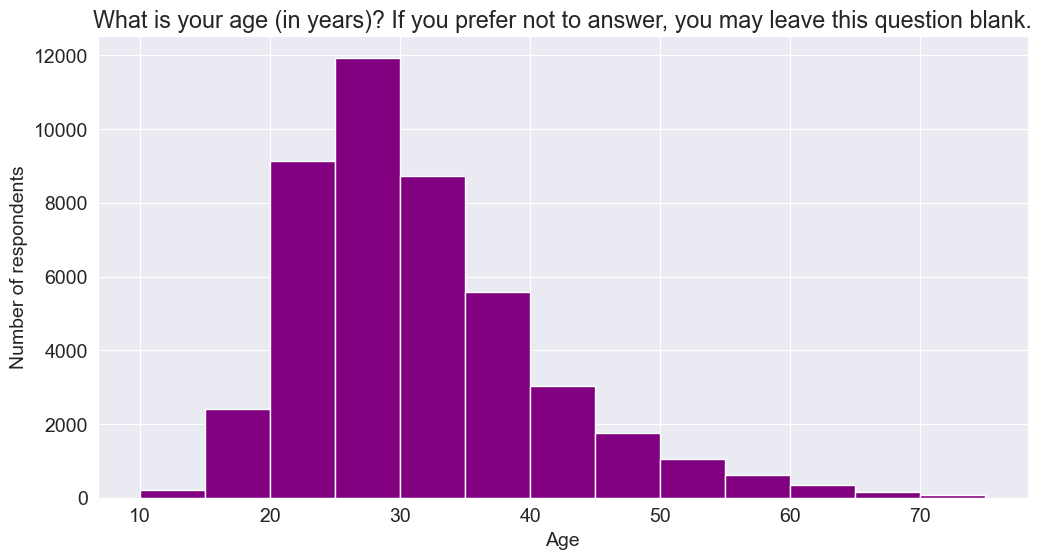

In [27]:
plt.figure(figsize=(12, 6))
plt.title(schema.Age)
plt.xlabel('Age')
plt.ylabel('Number of respondents')

plt.hist(survey_df.Age, bins=np.arange(10,80,5), color='purple');

- **Observation:**
  - *Dominant Age Group:*
    - It appears that a **large percentage** of respondents fall within the age range of **_20-45_** _years old_.
    - This observation is somewhat **representative** of the programming community at large.
  - *Youth in Computer Science:*
    - Many **young people** have embraced computer science as their field of study or profession over the last **_20_** **_years_**.


### Gender

Let's look at the distribution of responses for the Gender. It's a well-known fact that women and non-binary genders are underrepresented in the programming community, so we might expect to see a skewed distribution here.

In [28]:
schema.Gender

'Which of the following describe you, if any? Please check all that apply. If you prefer not to answer, you may leave this question blank.'

In [29]:
gender_counts = survey_df.Gender.value_counts()
gender_counts

Man                                                  45895
Woman                                                 3835
Non-binary, genderqueer, or gender non-conforming      385
Name: Gender, dtype: int64

A pie chart would be a great way to visualize the distribution.

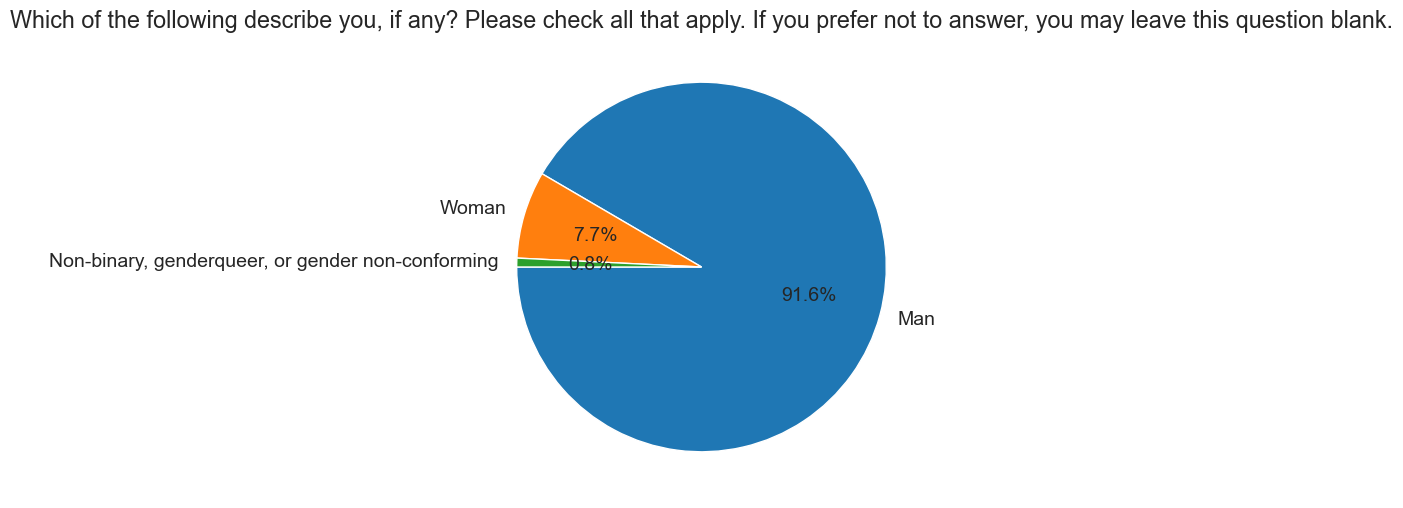

In [30]:
plt.figure(figsize=(12,6))
plt.title(schema.Gender)
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=180);

- **Key Finding:**


  - *Low Representation:* Only about **8%** of survey respondents who answered the question identify as **women or non-binary**.
  - *Comparison to Community:* This percentage is lower than the estimated overall percentage of women and non-binary genders in the programming community, which is typically around **12%**.

### Education Level

*Formal education in computer science is often considered an essential requirement for becoming a programmer.*

However, there are many free resources & tutorials available online to learn programming. Let's compare the education levels of respondents to gain some insight into this. We'll use a horizontal bar plot here.

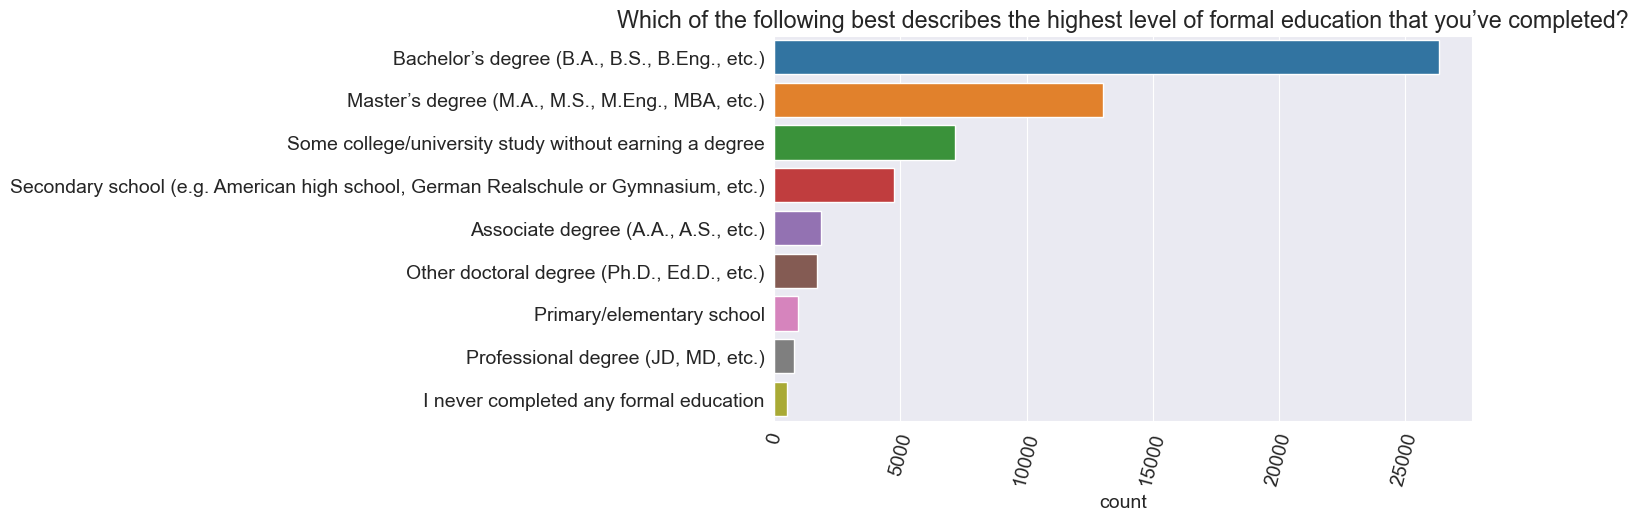

In [31]:
# Specify the order of categories in descending order
ed_level_order = survey_df['EdLevel'].value_counts().index

# Create the countplot with the specified order
sns.countplot(y=survey_df['EdLevel'], order=ed_level_order)
plt.xticks(rotation=75)
plt.title(schema['EdLevel'])
plt.ylabel(None);

- **Observation:**
  - *Education Levels:* It appears that well over **half** of the respondents hold a **bachelor's or master's degree**, indicating that most programmers have some form of **college education**.
  - *Clarification Needed:* However, it's important to note that from this graph alone, it's not clear whether these degrees are in the field of **computer science**.
It appears that well over half of the respondents hold a bachelor's or master's degree, so most programmers seem to have some college education. However, it's not clear from this graph alone if they hold a degree in computer science.

### Undergarduate Majors
Let's also plot undergraduate majors, but this time we'll convert the numbers into percentages and sort the values to make it easier to visualize the order.

In [32]:
schema.UndergradMajor

'What was your primary field of study?'

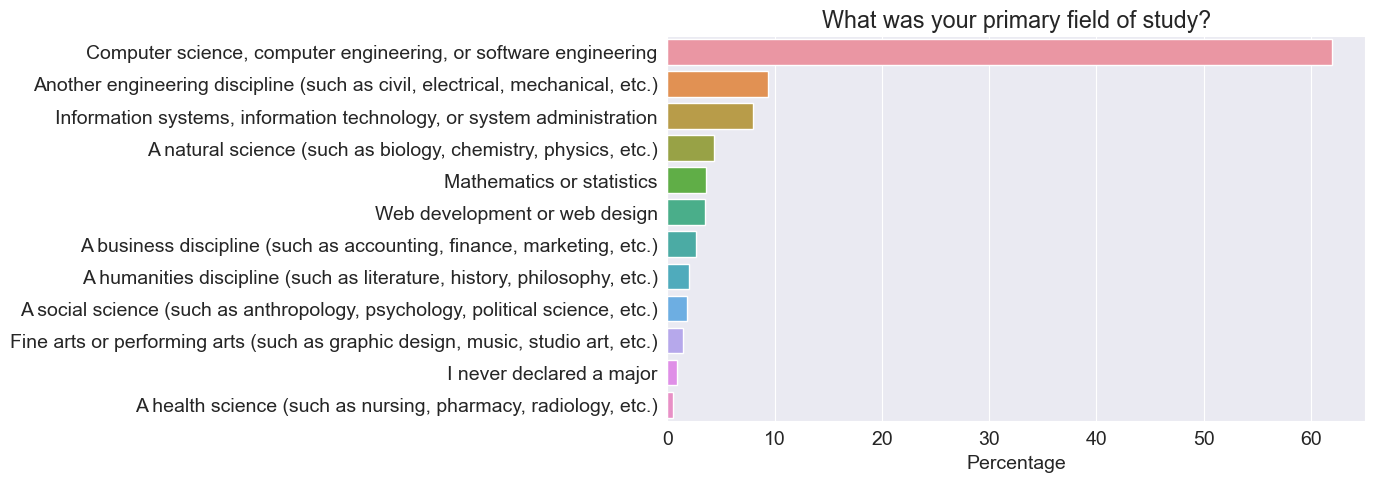

In [33]:
undergrad_pct = survey_df.UndergradMajor.value_counts() * 100 / survey_df.UndergradMajor.count()

sns.barplot(x=undergrad_pct, y=undergrad_pct.index)

plt.title(schema.UndergradMajor)
plt.ylabel(None);
plt.xlabel('Percentage');

- **Key Finding:**
  - *Encouraging Discovery:* It turns out that **40%** of programmers holding a college degree have a field of study other than computer science.
  - *Implication:* This finding suggests that while a college education can be valuable, it's encouraging to see that you don't necessarily need to pursue a major in computer science to become a successful programmer.
It turns out that 40% of programmers holding a college degree have a field of study other than computer science - which is very encouraging. It seems to suggest that while a college education is helpful in general, you do not need to pursue a major in computer science to become a successful programmer.

### Employment

**Freelancing** or **contract work** is a common choice among programmers, so it would be interesting to compare the breakdown between full-time, part-time, and freelance work. Let's visualize the data from the `Employment` column.

In [34]:
schema.Employment

'Which of the following best describes your current employment status?'

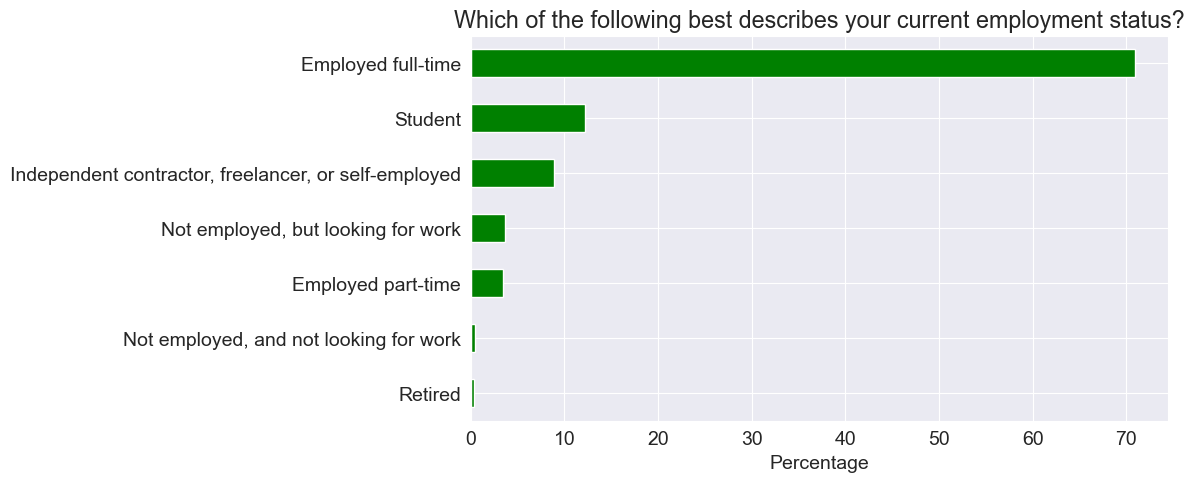

In [35]:
(survey_df.Employment.value_counts(normalize=True, ascending=True)*100).plot(kind='barh', color='g')
plt.title(schema.Employment)
plt.xlabel('Percentage');

- **Key Finding:**
  - *Employment Status:* It appears that approximately **10%** of respondents are employed part-time or work as freelancers.

### Developer Type
The`DevType` field contains information about the roles held by respondents. Since the question allows multiple answers, the column contains lists of values separated by a semi-colon `;`, making it a bit harder to analyze directly.

In [36]:
schema.DevType

'Which of the following describe you? Please select all that apply.'

In [37]:
survey_df.DevType.value_counts()

Developer, full-stack                                                                                                                                                           4396
Developer, back-end                                                                                                                                                             3056
Developer, back-end;Developer, front-end;Developer, full-stack                                                                                                                  2214
Developer, back-end;Developer, full-stack                                                                                                                                       1465
Developer, front-end                                                                                                                                                            1390
                                                                                               

In [38]:
def split_multicolumn(col_series):
    result_df = col_series.to_frame()
    options = []
    # Iterate over the column
    for idx, value  in col_series[col_series.notnull()].iteritems():
        # Break each value into list of options
        for option in value.split(';'):
            # Add the option as a column to result
            if not option in result_df.columns:
                options.append(option)
                result_df[option] = False
            # Mark the value in the option column as True
            result_df.at[idx, option] = True
    return result_df[options]

In [39]:
dev_type_df = split_multicolumn(survey_df.DevType)

C:\Users\Hp\AppData\Local\Temp\ipykernel_15420\3580593157.py:5: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for idx, value  in col_series[col_series.notnull()].iteritems():


In [40]:
dev_type_df

,"Developer, desktop or enterprise applications","Developer, full-stack","Developer, mobile",Designer,"Developer, front-end","Developer, back-end","Developer, QA or test",DevOps specialist,"Developer, game or graphics",Database administrator,...,System administrator,Engineering manager,Product manager,Data or business analyst,Academic researcher,Data scientist or machine learning specialist,Scientist,Senior executive/VP,"Engineer, site reliability",Marketing or sales professional
0,True,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,True,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64456,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
64457,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
64458,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
64459,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


The `dev_type_df` has one column for each option that can be selected as a response. If a respondent has chosen an option, the corresponding column's value is `True`. Otherwise, it is `False`.

We can now use the column-wise totals to identify the most common roles.


In [41]:
dev_type_totals = dev_type_df.sum().sort_values(ascending=False)
dev_type_totals

Developer, back-end                              26996
Developer, full-stack                            26915
Developer, front-end                             18128
Developer, desktop or enterprise applications    11687
Developer, mobile                                 9406
DevOps specialist                                 5915
Database administrator                            5658
Designer                                          5262
System administrator                              5185
Developer, embedded applications or devices       4701
Data or business analyst                          3970
Data scientist or machine learning specialist     3939
Developer, QA or test                             3893
Engineer, data                                    3700
Academic researcher                               3502
Educator                                          2895
Developer, game or graphics                       2751
Engineering manager                               2699
Product ma

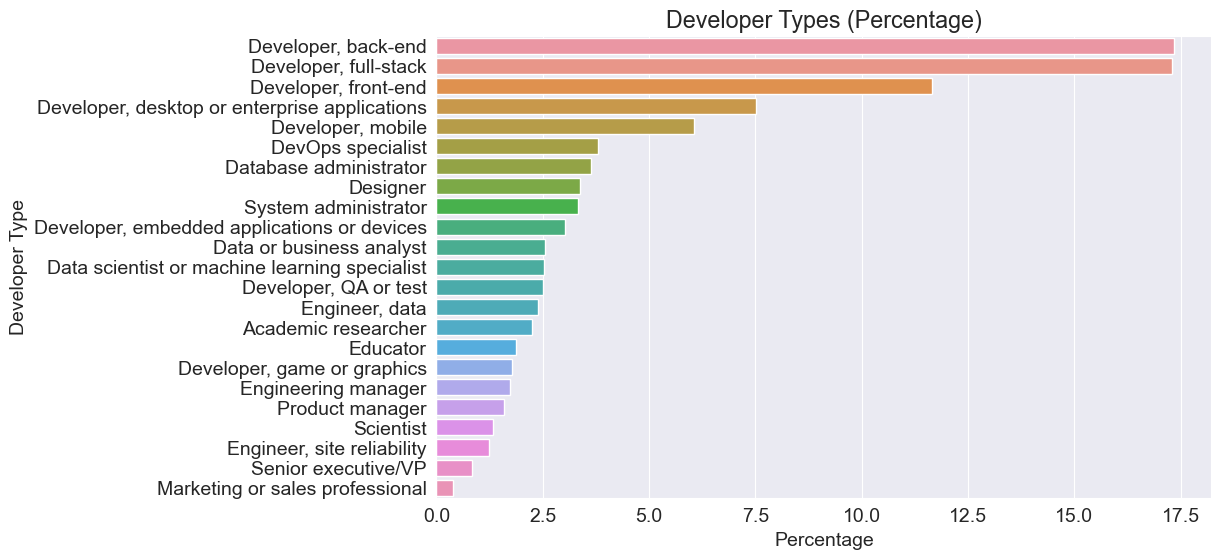

In [42]:
# Calculate the percentage values
total_count = dev_type_totals.sum()
percentage_values = (dev_type_totals / total_count) * 100

# Sort dev_type_totals and percentage_values in descending order
dev_type_totals = dev_type_totals.sort_values(ascending=False)
percentage_values = percentage_values.loc[dev_type_totals.index]

# Create a horizontal bar plot for percentage values
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
sns.barplot(x=percentage_values.values, y=percentage_values.index, orient='h')
plt.title("Developer Types (Percentage)")
plt.xlabel("Percentage")
plt.ylabel("Developer Type")
plt.show()

As one might expect, the most common roles include "Developer" in the name. 

**Questions**: 

* Can you figure out what percentage of respondents work in roles related to data science? 
* Which positions have the highest percentage of women?


In [43]:
# Filter the dataset to include only female respondents
female_df = survey_df[survey_df['Gender'] == 'Woman']

# Count the occurrences of each position among female respondents
position_counts = female_df['DevType'].str.split(';').explode().value_counts()

# Calculate the percentage of women in each position
percentage_women_by_position = (position_counts / len(female_df)) * 100

# Identify the position with the highest percentage of women
position_with_highest_percentage_women = percentage_women_by_position.idxmax()
print('Women with highest Percentage by Role: ' + position_with_highest_percentage_women)


Women with highest Percentage by Role: Developer, full-stack


In [44]:
# Replace NaN values in the 'DevType' column with an empty string
survey_df['DevType'] = survey_df['DevType'].fillna('')

# Define a list of data science-related job titles
data_science_roles = ['Data Scientist', 'Data scientist or machine learning specialist', 'Data or business analyst']

# Filter the dataset based on data science roles
data_scientists_df = survey_df[survey_df['DevType'].apply(lambda x: any(role in x for role in data_science_roles))]

# Calculate the percentage of respondents in data science roles
percentage_data_scientists = (len(data_scientists_df) / len(survey_df)) * 100
print('Percentage of Data Scientists: ' + str(percentage_data_scientists))


Percentage of Data Scientists: 10.319410319410318


## Stage 3 - Initiating and addressing captivating questions

We've already uncovered valuable insights about the respondents and the programming community through our exploration of individual dataset columns. Now, let's delve into **more targeted questions** and seek answers by leveraging data frame operations and visualizations.

#### Q: What are the most popular programming languages in 2020? 

To answer, this we can use the `LanguageWorkedWith` column. Similar to `DevType`, respondents were allowed to choose multiple options here.

In [45]:
survey_df.LanguageWorkedWith

0                                   C#;HTML/CSS;JavaScript
1                                         JavaScript;Swift
2                                 Objective-C;Python;Swift
3                                                      NaN
4                                        HTML/CSS;Ruby;SQL
                               ...                        
64456                                                  NaN
64457    Assembly;Bash/Shell/PowerShell;C;C#;C++;Dart;G...
64458                                                  NaN
64459                                             HTML/CSS
64460                      C#;HTML/CSS;Java;JavaScript;SQL
Name: LanguageWorkedWith, Length: 64306, dtype: object

In [46]:
languages_worked_df = split_multicolumn(survey_df.LanguageWorkedWith)

C:\Users\Hp\AppData\Local\Temp\ipykernel_15420\3580593157.py:5: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for idx, value  in col_series[col_series.notnull()].iteritems():


In [47]:
languages_worked_df

,C#,HTML/CSS,JavaScript,Swift,Objective-C,Python,Ruby,SQL,Java,PHP,...,VBA,Perl,Scala,C++,Go,Haskell,Rust,Dart,Julia,Assembly
0,True,True,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,True,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,True,True,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,True,False,False,False,False,True,True,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64456,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
64457,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
64458,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
64459,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


It appears that a total of 25 languages were included among the options. Let's aggregate these to identify the percentage of respondents who selected each language.


In [48]:
languages_worked_percentages = languages_worked_df.mean().sort_values(ascending=False) * 100
languages_worked_percentages

JavaScript               59.893323
HTML/CSS                 55.801947
SQL                      48.444935
Python                   39.001026
Java                     35.618760
Bash/Shell/PowerShell    29.239884
C#                       27.803004
PHP                      23.130035
TypeScript               22.461357
C++                      21.114670
C                        19.236152
Go                        7.758219
Kotlin                    6.887382
Ruby                      6.229590
Assembly                  5.447392
VBA                       5.394520
Swift                     5.226573
R                         5.064846
Rust                      4.498803
Objective-C               3.603085
Dart                      3.517557
Scala                     3.150561
Perl                      2.757130
Haskell                   1.861413
Julia                     0.782198
dtype: float64

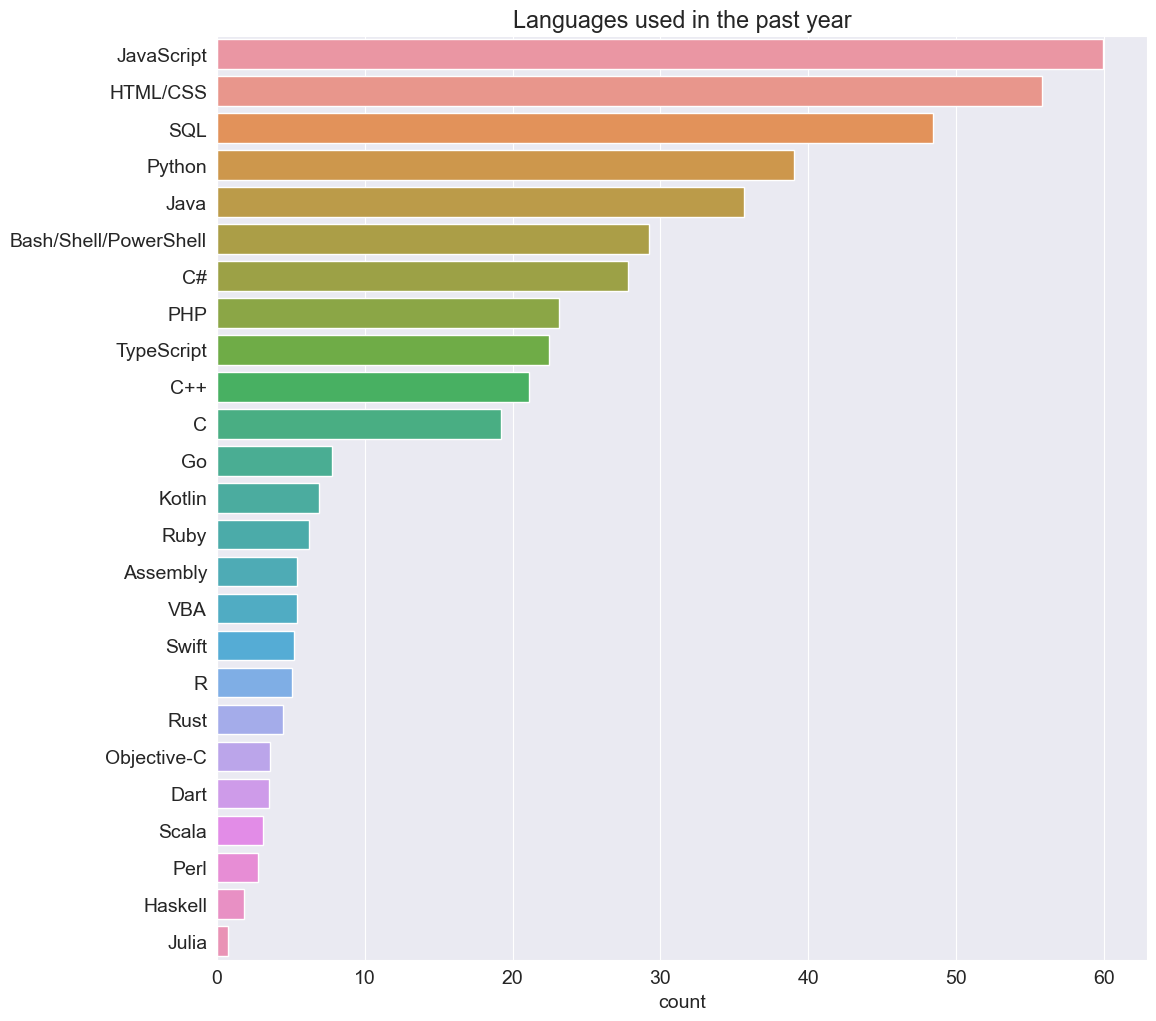

In [49]:
plt.figure(figsize=(12, 12))
sns.barplot(x=languages_worked_percentages, y=languages_worked_percentages.index)
plt.title("Languages used in the past year");
plt.xlabel('count');

**Observation:**
- *Web Development Dominance:* Perhaps unsurprisingly, **JavaScript & HTML/CSS** emerge as the top skills. Web development is highly sought after in today's tech landscape and is also known for its accessibility to beginners.
- *SQL's Prevalence:* **SQL** is deemed essential for working with relational databases, and it's no surprise that the majority of programmers work with SQL on a regular basis.
- *Python's Popularity:* **Python** stands out as the **preferred choice** for various forms of development, surpassing Java, which had been the industry standard for server and application development for over two decades.

#### Q: Which languages are the most people interested to learn over the next year?

For this, we can use the `LanguageDesireNextYear` column, with similar processing as the previous one.

In [50]:
languages_interested_df = split_multicolumn(survey_df.LanguageDesireNextYear)
languages_interested_percentages = languages_interested_df.mean().sort_values(ascending=False) * 100
languages_interested_percentages

C:\Users\Hp\AppData\Local\Temp\ipykernel_15420\3580593157.py:5: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for idx, value  in col_series[col_series.notnull()].iteritems():


Python                   41.143906
JavaScript               40.425466
HTML/CSS                 32.028116
SQL                      30.799614
TypeScript               26.451653
C#                       21.058688
Java                     20.464653
Go                       19.432090
Bash/Shell/PowerShell    18.057413
Rust                     16.270643
C++                      15.014151
Kotlin                   14.760676
PHP                      10.947657
C                         9.359935
Swift                     8.692812
Dart                      7.308805
R                         6.571704
Ruby                      6.425528
Scala                     5.326097
Haskell                   4.593662
Assembly                  3.766367
Julia                     2.540976
Objective-C               2.338818
Perl                      1.761888
VBA                       1.611047
dtype: float64

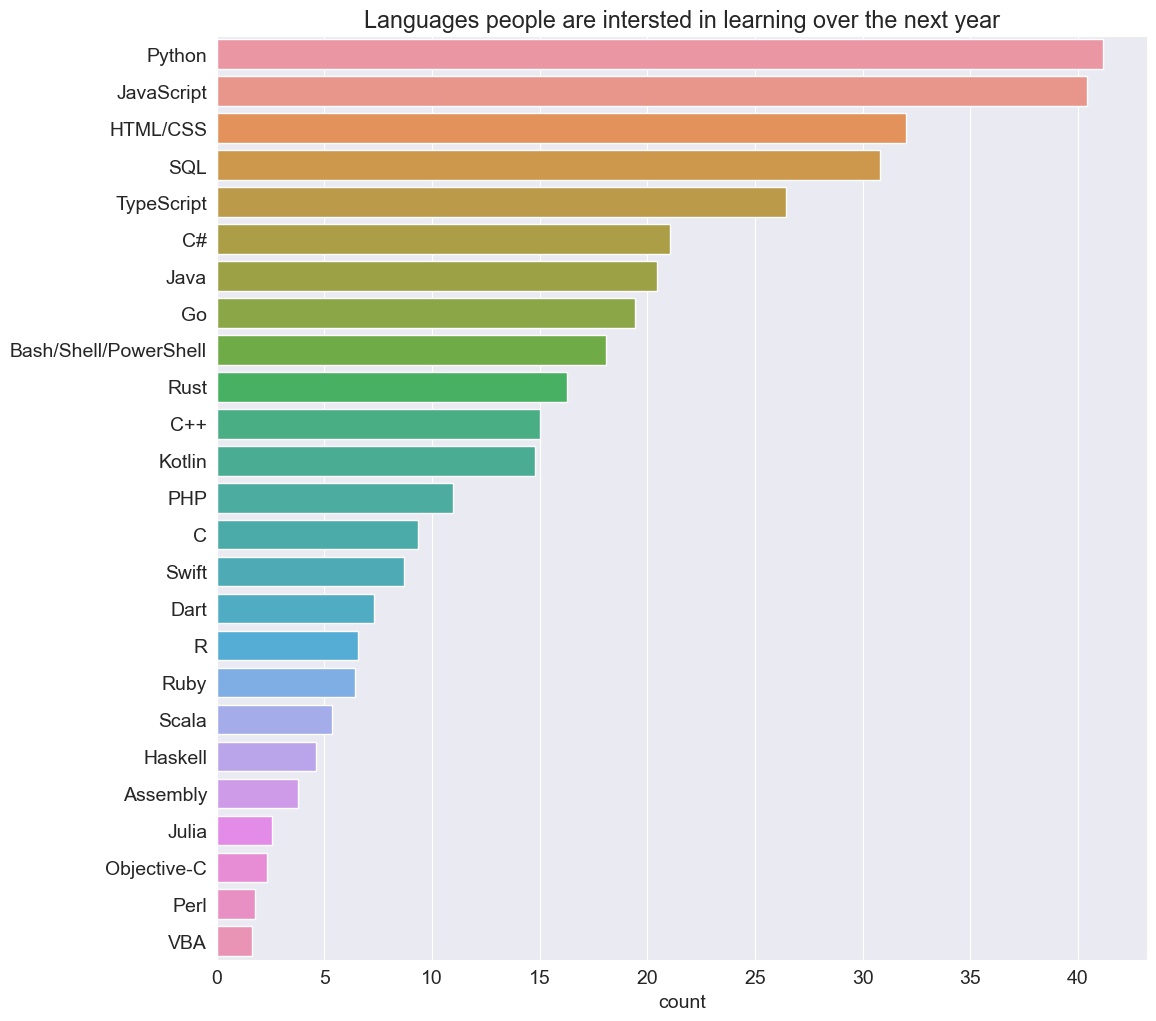

In [51]:
plt.figure(figsize=(12, 12))
sns.barplot(x=languages_interested_percentages, y=languages_interested_percentages.index)
plt.title("Languages people are intersted in learning over the next year");
plt.xlabel('count');

- **Key Insight:**
  - *Python's Popularity:* Once again, it's not surprising that **Python** is the language most people are interested in learning.
  - *Versatility:* Python's popularity stems from its status as an easy-to-learn, general-purpose programming language that's well-suited for a wide range of domains, including application development, numerical computing, data analysis, machine learning, big data, cloud automation, web scraping, scripting, and more.
  - *Shared Use:* It's worth noting that we are using Python for this very analysis, so we're in good company!


#### Q: Which are the most loved languages, i.e., a high percentage of people who have used the language want to continue learning & using it over the next year?

To solve this question, follow these steps:

- **Step 1:** Create a new DataFrame `languages_loved_df` with `True` values for a language only if both `languages_worked_df` and `languages_interested_df` have `True` values for that language.

- **Step 2:** Calculate the percentage of respondents who "love" each language by dividing the column-wise sum of `languages_loved_df` by the column-wise sum of `languages_worked_df`.

- **Step 3:** Sort the results in descending order based on the calculated percentages.

- **Step 4:** Plot a horizontal bar graph to visualize the most loved languages.


In [52]:
languages_loved_df = languages_worked_df & languages_interested_df

In [53]:
languages_loved_percentages = (languages_loved_df.sum() * 100/ languages_worked_df.sum()).sort_values(ascending=False)

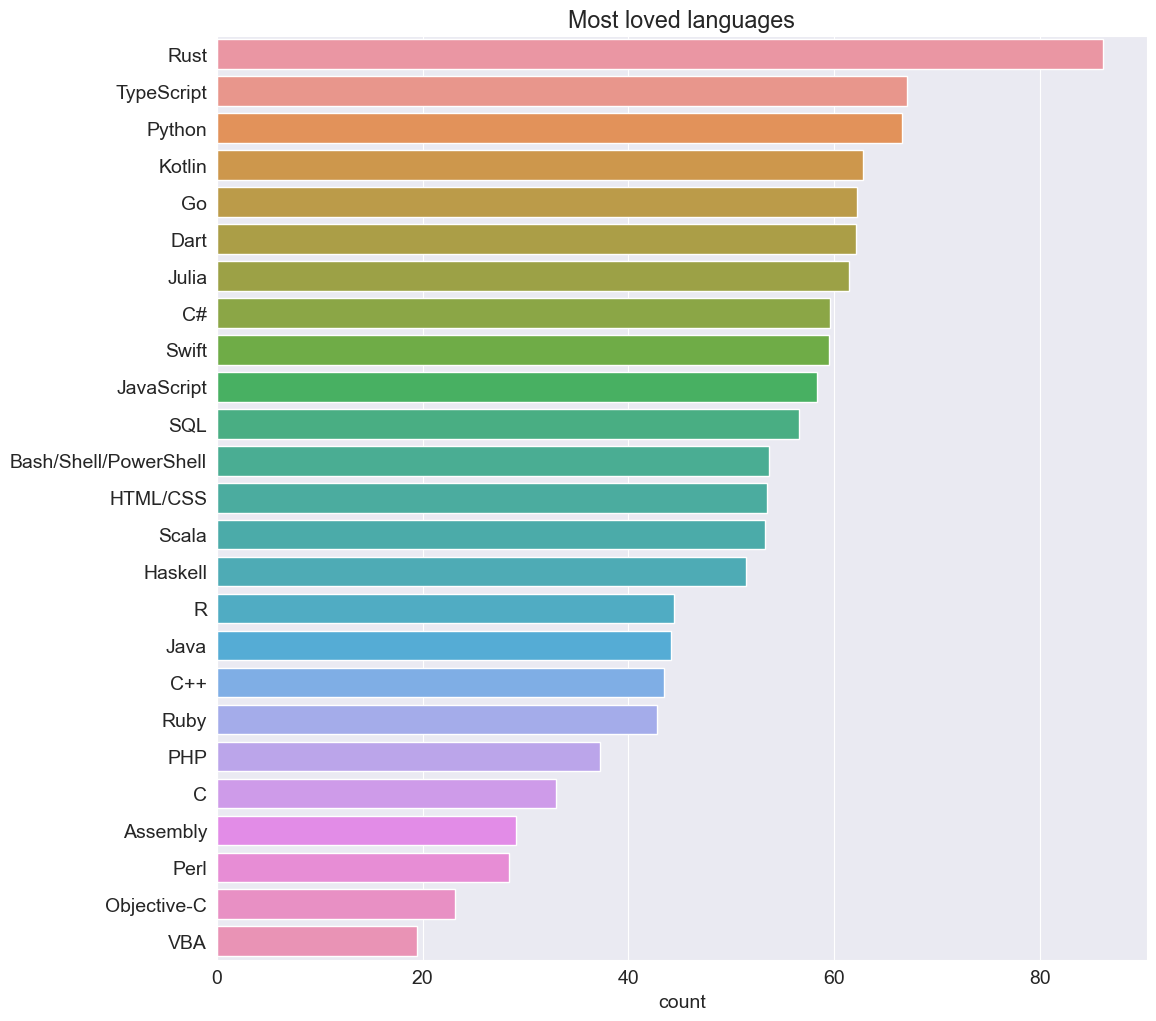

In [54]:
plt.figure(figsize=(12, 12))
sns.barplot(x=languages_loved_percentages, y=languages_loved_percentages.index)
plt.title("Most loved languages");
plt.xlabel('count');

**Insights:**
- *Rust's Popularity:* **Rust** has maintained its position as **StackOverflow's most-loved language** for four consecutive years, showcasing its strong appeal among developers.
- *TypeScript's Rise:* The **second most-loved language** is **TypeScript**, which serves as a popular alternative to JavaScript, particularly for web development.
- *Python's Resilience:* **Python** holds the **third position**, which is noteworthy given its status as one of the most widely-used languages globally. Python's enduring popularity can be attributed to its strong foundations, ease of learning and usage, extensive ecosystem of domain-specific libraries, and a vast and thriving worldwide community.


**Q: In which countries do developers work the highest number of hours per week?**

To answer this question, we'll use the `groupby` data frame method to aggregate the rows for each country. We'll also filter the results to only include the countries with more than 250 respondents.


In [55]:
countries_df = survey_df.groupby('Country')[['WorkWeekHrs']].mean().sort_values('WorkWeekHrs', ascending=False)

In [56]:
high_response_countries_df = countries_df.loc[survey_df.Country.value_counts() > 250].head(15)

In [57]:
high_response_countries_df

,WorkWeekHrs
Country,
Iran,44.337748
Israel,43.915094
China,42.150000
United States,41.802982
Greece,41.402724
Viet Nam,41.391667
South Africa,41.023460
Turkey,40.982143
Sri Lanka,40.612245


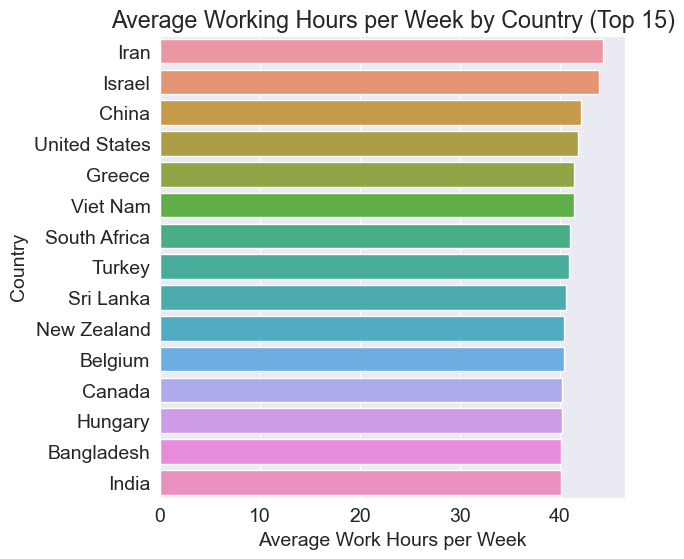

In [58]:
# Assuming you have the 'high_response_countries_df' DataFrame containing the filtered countries data

plt.figure(figsize=(6, 6))
sns.barplot(x=high_response_countries_df['WorkWeekHrs'], y=high_response_countries_df.index, orient='h')
plt.title("Average Working Hours per Week by Country (Top 15)")
plt.xlabel('Average Work Hours per Week')
plt.ylabel('Country')
plt.show()


**Insights:**
- *Highest Working Hours:* Asian countries such as **Iran**, **China**, and **Israel** lead in terms of working hours per week, followed closely by the **United States**.
- *Minimal Variation:* Interestingly, there isn't significant variation overall, and the average working hours across countries tend to hover around the standard 40 hours per week.


#### Q: How important is it to start young to build a career in programming?

Let's create a scatter plot of `Age` vs. `YearsCodePro` (i.e., years of coding experience) to answer this question.

In [59]:
schema.YearsCodePro

'NOT including education, how many years have you coded professionally (as a part of your work)?'

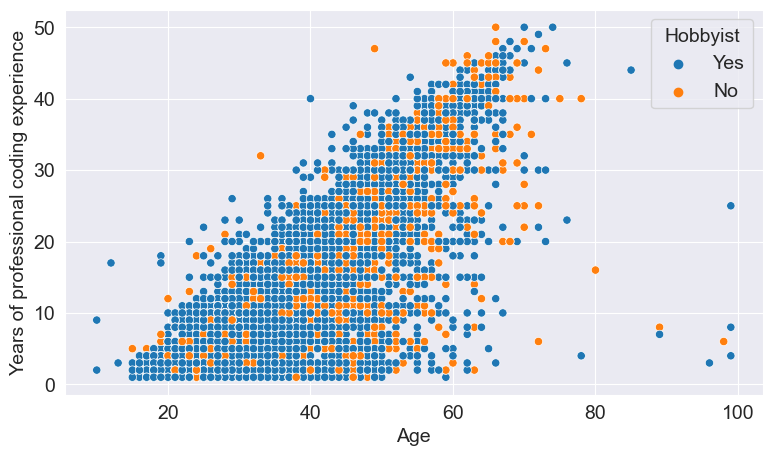

In [60]:
sns.scatterplot(x='Age', y='YearsCodePro', hue='Hobbyist', data=survey_df)
plt.xlabel("Age")
plt.ylabel("Years of professional coding experience");

**Insights:**
- *Programming at Any Age:* You can see points scattered all over the graph, indicating that individuals can **start programming professionally at any age**. This diversity highlights that there's no age limit to entering the programming field, and many individuals transition to professional programming even after several decades in other careers.
- *First Programming Experience:* Additionally, we can explore the distribution of the `Age1stCode` column to understand when respondents first attempted programming.


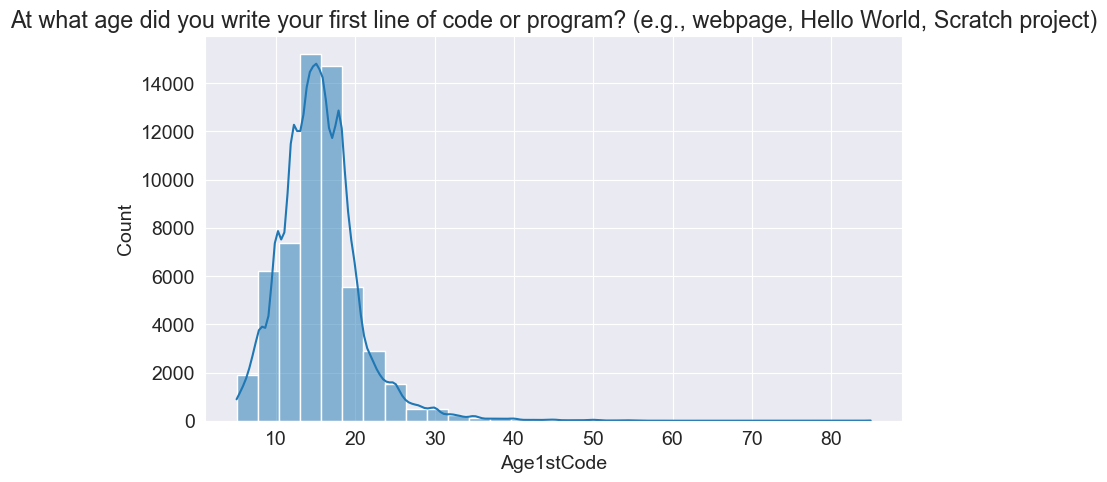

In [61]:
plt.title(schema.Age1stCode)
sns.histplot(x=survey_df.Age1stCode, bins=30, kde=True);

**Insights:**
- **_Early Exposure:_** As you might expect, most people seem to have had some exposure to programming ***before the age of 40***. This suggests that many individuals begin their programming journey early in life.
- **_Inclusivity:_** However, it's important to note that there are people of all ages and walks of life learning to code. The data reflects the **_inclusivity_** of the programming community, where individuals from various backgrounds and age groups are taking up coding.


## Stage - 4 **Inferences and Conclusions**

As a Python data analyst, I've extracted valuable insights from the survey data, and I'm presenting them in an organized and visually appealing manner.

#### **Demographic Representation**
- *Survey Demographics:* Based on the demographics of survey respondents, it's evident that the survey provides a fairly representative view of the programming community. However, it may lack adequate responses from non-English-speaking countries and women & non-binary genders.

#### **Diversity and Inclusivity**
- *Promoting Diversity:* The programming community, while making strides, still faces challenges in terms of diversity. To foster inclusivity, we should intensify efforts to support and encourage underrepresented communities, including those of different ages, countries, races, genders, and more.

#### **Education and Career**
- *College Degrees:* While a significant portion of programmers hold college degrees, it's noteworthy that not all have computer science as their major. This highlights that a computer science degree is not a strict prerequisite for entering the coding world.

- *Part-Time and Freelance Work:* A substantial percentage of programmers engage in part-time or freelance work, serving as an excellent entry point for those starting their careers.

#### **Programming Languages**
- *Top Programming Languages:* In 2020, JavaScript & HTML/CSS emerged as the most frequently used programming languages, closely followed by SQL & Python.

- *Python's Popularity:* Python stands out as the language of choice for those interested in learning, given its user-friendly, versatile nature.

- *Most "Loved" Languages:* Rust and TypeScript claimed the top spots as the most "loved" languages in 2020, with Python trailing closely behind despite its already widespread use.

#### **Working Hours and Age**
- *Average Working Hours:* Programmers worldwide typically work around 40 hours per week, with slight variations by country.

- *Age No Barrier:* An encouraging finding is that age is no barrier to starting a career in programming. Individuals can embark on a long and fulfilling journey in programming, even if they also enjoy it as a hobby.

By presenting these insights in a structured and visually appealing format, I aim to provide a comprehensive overview of the survey findings that is both engaging and informative.


## References and Future Work

Check out the following resources to learn more about the dataset and tools used in this notebook:

- Stack Overflow Developer Survey: https://insights.stackoverflow.com/survey
- Pandas user guide: https://pandas.pydata.org/docs/user_guide/index.html
- Matplotlib user guide: https://matplotlib.org/3.3.1/users/index.html
- Seaborn user guide & tutorial: https://seaborn.pydata.org/tutorial.html